In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Завантаження даних
url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/data/renfe_small.csv"
data = pd.read_csv(url)

In [3]:
data = data[['price', 'train_type', 'fare', 'origin', 'destination']]
data = data.dropna()

In [4]:
threshold = data['price'].median()
data['price_category'] = (data['price'] > threshold).astype(int)
categorical_columns = ['train_type', 'fare', 'origin', 'destination']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [5]:
X = data.drop(columns=['price', 'price_category'])
y = data['price_category']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6528246515040352

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.32      0.48      3440
           1       0.59      1.00      0.74      3375

    accuracy                           0.65      6815
   macro avg       0.79      0.66      0.61      6815
weighted avg       0.79      0.65      0.61      6815



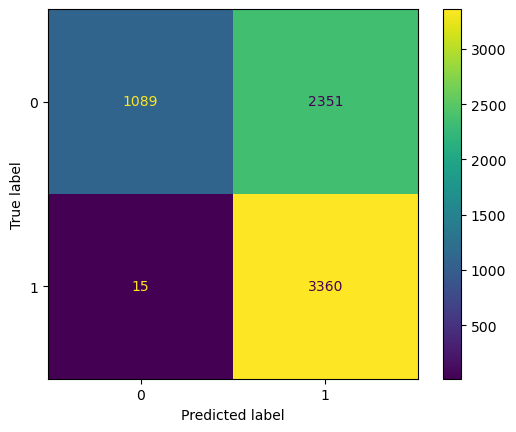

In [8]:
# Матриця
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()